In [245]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [246]:
# Importing all datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')
train_df.head()
dataset=pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

In [247]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [248]:
dataset.shape

(1309, 12)

## Feature Analysis (Character) Variable-by-Variable Analysis of Character Features [Name , Sex , Ticket , Cabin , Embarked]] Cabin and Embarked are Missing

In [249]:
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [250]:
dataset_title=[i.split(",")[1].split('.')[0].strip() for i in dataset['Name']]
dataset['Title']=pd.Series(dataset_title)
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

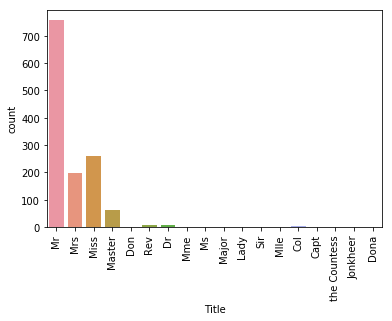

In [251]:
sns.countplot(x='Title',data=dataset)
plt.xticks(rotation = 90)

In [252]:
# We can replace many titles with a more common name or classify them as Rare.
dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Sex

In [253]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Ticket

In [254]:
# Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
dataset["Ticket"] = Ticket

In [255]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A5,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STONO2,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,X,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,X,Mr


## Cabin

In [256]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

## Embarked

In [257]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [258]:
dataset['Embarked']=dataset['Embarked'].fillna(freq_port)

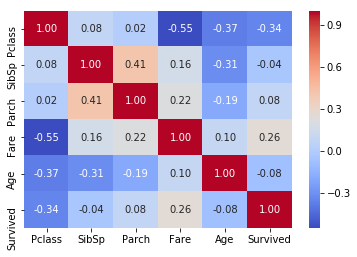

In [259]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
sns.heatmap(train_df[["Pclass","SibSp","Parch","Fare","Age","Survived"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [260]:
# Pclass(D)-Survived
# Significant correlation with Pclass=1 > 62 %. Should be included in our Model.
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## SibSp & Parch

In [261]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [262]:
# Parch(D)-Survived
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [263]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [264]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,Single,SmallF,MedF,LargeF
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A5,Mr,2,0,1,0,0
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC,Mrs,2,0,1,0,0
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STONO2,Miss,1,1,0,0,0
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,X,Mrs,2,0,1,0,0
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,X,Mr,1,1,0,0,0


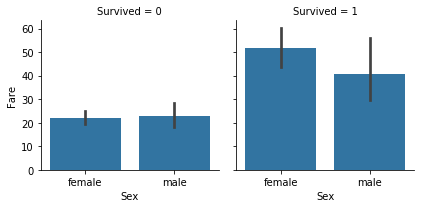

In [265]:
sns.FacetGrid(train_df,col='Survived').map(sns.barplot,'Sex','Fare')
# Higher Fare paying passengers survived , hence it can be included in the model.Since its continuous numeric , a
# new feature FareRange needs to be created for analysis

# Since Fare is Continuous we will plot distribution plot next

In [266]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [267]:
dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].dropna().median())
#train_df['Fare']=train_df['Fare'].fillna(train_df['Fare'].dropna().median(),inplace=True)

In [268]:
dataset['FareBand']=pd.qcut(dataset['Fare'],4)
dataset[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 2.066]",0.197309
1,"(2.066, 2.671]",0.303571
2,"(2.671, 3.443]",0.441048
3,"(3.443, 6.239]",0.600000


In [269]:
dataset.loc[dataset['Fare'] <=2.06,'Fare']=0
dataset.loc[(dataset['Fare'] <=2.67) & (dataset['Fare'] > 2.06)  ,'Fare']=1
dataset.loc[(dataset['Fare'] <=3.44) & (dataset['Fare'] > 2.67)  ,'Fare']=2
dataset.loc[(dataset['Fare'] <=6.2) & (dataset['Fare'] > 3.44)  ,'Fare']=3
dataset.loc[dataset['Fare'] > 6.2  ,'Fare']=4
dataset['Fare']=dataset['Fare'].astype(int)

In [270]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,Single,SmallF,MedF,LargeF,FareBand
0,22.0,X,S,0,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A5,Mr,2,0,1,0,0,"(-0.001, 2.066]"
1,38.0,C,C,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC,Mrs,2,0,1,0,0,"(3.443, 6.239]"
2,26.0,X,S,1,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STONO2,Miss,1,1,0,0,0,"(2.066, 2.671]"
3,35.0,C,S,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,X,Mrs,2,0,1,0,0,"(3.443, 6.239]"
4,35.0,X,S,1,"Allen, Mr. William Henry",0,5,3,male,0,0.0,X,Mr,1,1,0,0,0,"(2.066, 2.671]"


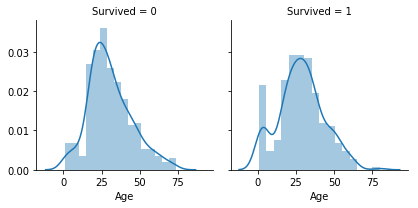

In [271]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'Age')

In [272]:
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)
for i in index_NaN_age:
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) &
                               (dataset['Parch'] == dataset.iloc[i]["Parch"]) &
                               (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        #print(i)
        dataset['Age'].iloc[i] = age_med

In [273]:
dataset['AgeBand']=pd.cut(dataset['Age'],5)

In [274]:
dataset[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean()

,AgeBand,Survived
0,"(0.0902, 16.136]",0.500000
1,"(16.136, 32.102]",0.341719
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [275]:
dataset.loc[dataset['Age'] <=16 , 'Age' ] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=32) , 'Age' ] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <=48) , 'Age' ] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64) , 'Age' ] = 3
dataset.loc[(dataset['Age'] > 64) , 'Age' ] = 4
dataset['Age']=dataset['Age'].astype(int)

In [276]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,Single,SmallF,MedF,LargeF,FareBand,AgeBand
0,1,X,S,0,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A5,Mr,2,0,1,0,0,"(-0.001, 2.066]","(16.136, 32.102]"
1,2,C,C,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC,Mrs,2,0,1,0,0,"(3.443, 6.239]","(32.102, 48.068]"
2,1,X,S,1,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STONO2,Miss,1,1,0,0,0,"(2.066, 2.671]","(16.136, 32.102]"
3,2,C,S,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,X,Mrs,2,0,1,0,0,"(3.443, 6.239]","(32.102, 48.068]"
4,2,X,S,1,"Allen, Mr. William Henry",0,5,3,male,0,0.0,X,Mr,1,1,0,0,0,"(2.066, 2.671]","(32.102, 48.068]"


In [277]:
# DROP
dataset=dataset.drop(['Name','Parch','PassengerId','SibSp','Fsize','FareBand','AgeBand'],axis=1)

In [278]:
# ENCODING
dataset=pd.get_dummies(dataset)

In [279]:
dataset.head()

,Age,Fare,Pclass,Survived,Single,SmallF,MedF,LargeF,Cabin_A,Cabin_B,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,3,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,3,1,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2,1,3,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [280]:
dataset.shape

(1309, 64)

In [281]:
dataset=pd.get_dummies(dataset,prefix=['Pclass','Age','Fare'],columns=['Pclass','Age','Fare'])

In [282]:
dataset.shape

(1309, 74)

In [283]:
# Checking the percentage of missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

Survived          31.93
Single             0.00
SmallF             0.00
MedF               0.00
LargeF             0.00
Cabin_A            0.00
Cabin_B            0.00
Cabin_C            0.00
Cabin_D            0.00
Cabin_E            0.00
Cabin_F            0.00
Cabin_G            0.00
Cabin_T            0.00
Cabin_X            0.00
Embarked_C         0.00
Embarked_Q         0.00
Embarked_S         0.00
Sex_female         0.00
Sex_male           0.00
Ticket_A           0.00
Ticket_A4          0.00
Ticket_A5          0.00
Ticket_AQ3         0.00
Ticket_AQ4         0.00
Ticket_AS          0.00
Ticket_C           0.00
Ticket_CA          0.00
Ticket_CASOTON     0.00
Ticket_FC          0.00
Ticket_FCC         0.00
                  ...  
Ticket_SOP         0.00
Ticket_SOPP        0.00
Ticket_SOTONO2     0.00
Ticket_SOTONOQ     0.00
Ticket_SP          0.00
Ticket_STONO       0.00
Ticket_STONO2      0.00
Ticket_STONOQ      0.00
Ticket_SWPP        0.00
Ticket_WC          0.00
Ticket_WEP      

In [284]:
# Removing NaN TotalCharges rows
dataset = dataset[~np.isnan(dataset['Survived'])]

### Step 4: Test-Train Split

In [285]:
# Putting feature variable to X
X = dataset.drop(['Survived'], axis=1)

X.head()

,Single,SmallF,MedF,LargeF,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,Age_0,Age_1,Age_2,Age_3,Age_4,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [286]:
# Putting response variable to y
y = dataset['Survived']

y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.54, test_size=0.46, random_state=100)

In [289]:
print(X_train.shape)
print(X_test.shape)

(481, 73)
(410, 73)


# Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [290]:
import statsmodels.api as sm

In [291]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  481
Model:                            GLM   Df Residuals:                      429
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 06 Sep 2019   Deviance:                          nan
Time:                        15:34:35   Pearson chi2:                 3.78e+17
No. Iterations:                   100   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.484e+14   5.99e+06  -7.48e+07      0.000   -4.48e+14   -4.48e+14
Single              6e+14   8.17e+06   7.34e+07      0.000       6e+14       6e+14
SmallF           6.33e+13    7.9e+06   8.01e+06      0.000    6.33e+13    6.33e+13
MedF            2.868e+14    7.9e+06   3.63e+07      0.000    2.87e+14    2.87e+14
LargeF         -1.399e+15   1.23e+07  -1.14e+08      0.000    -1.4e+15    -1.4e+15
Cabin_A         1.319e+15   2.46e+07   5.37e+07      0.000    1.32e+15    1.32e+15
Cabin_B         7.013e+14    1.8e+07    3.9e+07      0.000    7.01e+14    7.01e+14
Cabin_C         1.651e+15   1.67e+07   9.86e+07      0.000    1.65e+15    1.65e+15
Cabin_D         2.043e+15   1.98e+07   1.03e+08      0.000    2.04e+15    2.04e+15
Cabin_E         1.376e+15    1.8e+07   7.66e+07      0.000    1.38e+15    1.38e+15
Cabin_F         3.607e+14   2.63e+07   1.37e+07      0.000    3.61e+14    3.61e+14
Cabin_G        -6.527e+15   6.27e+07  -1.04e+08      0.000   -6.53e+15   -6.53e+15
Cabin_T        -2.029e+15   6.15e+07   -3.3e+07      0.000   -2.03e+15   -2.03e+15
Cabin_X         6.561e+14   1.45e+07   4.54e+07      0.000    6.56e+14    6.56e+14
Embarked_C     -1.817e+14   7.45e+06  -2.44e+07      0.000   -1.82e+14   -1.82e+14
Embarked_Q      1.796e+14   8.95e+06   2.01e+07      0.000     1.8e+14     1.8e+14
Embarked_S     -4.464e+14   5.98e+06  -7.46e+07      0.000   -4.46e+14   -4.46e+14
Sex_female      1.392e+15   2.75e+07   5.06e+07      0.000    1.39e+15    1.39e+15
Sex_male        -1.84e+15   2.64e+07  -6.98e+07      0.000   -1.84e+15   -1.84e+15
Ticket_A          -1.5381    4.4e-08   -3.5e+07      0.000      -1.538      -1.538
Ticket_A4      -1.058e+15   3.08e+07  -3.44e+07      0.000   -1.06e+15   -1.06e+15
Ticket_A5       5.411e+14   2.16e+07   2.51e+07      0.000    5.41e+14    5.41e+14
Ticket_AQ3        -2.5088   2.25e-08  -1.12e+08      0.000      -2.509      -2.509
Ticket_AQ4        -7.0364   7.31e-08  -9.63e+07      0.000      -7.036      -7.036
Ticket_AS      -3.774e+15   6.53e+07  -5.78e+07      0.000   -3.77e+15   -3.77e+15
Ticket_C       -2.746e+15   3.91e+07  -7.03e+07      0.000   -2.75e+15   -2.75e+15
Ticket_CA       8.487e+14   1.77e+07   4.78e+07      0.000    8.49e+14    8.49e+14
Ticket_CASOTON    -5.1320   6.68e-08  -7.69e+07      0.000      -5.132      -5.132
Ticket_FC         -4.4545   3.86e-08  -1.15e+08      0.000      -4.454      -4.454
Ticket_FCC       4.01e+14   4.81e+07   8.34e+06      0.000    4.01e+14    4.01e+14
Ticket_Fa         -1.4625    2.9e-08  -5.05e+07      0.000      -1.463      -1.463
Ticket_LINE    -8.716e+14   4.79e+07  -1.82e+07      0.000   -8.72e+14   -8.72e+14
Ticket_LP         -4.8443   5.45e-08  -8.89e+07      0.000      -4.844      -4.844
Ticket_PC       1.209e+14   1.86e+07   6.48e+06      0.000    1.21e+14    1.21e+14
Ticket_PP       9.137e+15   9.21e+07   9.92e+07      0.000    9.14e+15    9.14e+15
Ticket_P

## Step 8: Feature Selection Using RFE

In [292]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [293]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, Y_train)

In [294]:
rfe.support_

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True])

In [295]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Single', False, 10),
 ('SmallF', False, 27),
 ('MedF', False, 28),
 ('LargeF', True, 1),
 ('Cabin_A', False, 18),
 ('Cabin_B', False, 29),
 ('Cabin_C', False, 19),
 ('Cabin_D', False, 2),
 ('Cabin_E', True, 1),
 ('Cabin_F', False, 32),
 ('Cabin_G', False, 20),
 ('Cabin_T', False, 25),
 ('Cabin_X', False, 6),
 ('Embarked_C', False, 3),
 ('Embarked_Q', False, 48),
 ('Embarked_S', False, 16),
 ('Sex_female', True, 1),
 ('Sex_male', False, 4),
 ('Ticket_A', False, 61),
 ('Ticket_A4', False, 31),
 ('Ticket_A5', False, 39),
 ('Ticket_AQ3', False, 62),
 ('Ticket_AQ4', False, 59),
 ('Ticket_AS', False, 44),
 ('Ticket_C', False, 38),
 ('Ticket_CA', False, 36),
 ('Ticket_CASOTON', False, 54),
 ('Ticket_FC', False, 53),
 ('Ticket_FCC', False, 37),
 ('Ticket_Fa', False, 63),
 ('Ticket_LINE', False, 41),
 ('Ticket_LP', False, 60),
 ('Ticket_PC', False, 8),
 ('Ticket_PP', False, 21),
 ('Ticket_PPP', False, 52),
 ('Ticket_SC', False, 43),
 ('Ticket_SCA3', False, 64),
 ('Ticket_SCA4', False, 47),
 

In [296]:
col = X_train.columns[rfe.support_]
col

Index(['LargeF', 'Cabin_E', 'Sex_female', 'Ticket_STONO', 'Ticket_SWPP',
       'Title_Master', 'Title_Mr', 'Title_Rare', 'Pclass_3', 'Fare_4'],
      dtype='object')

In [297]:
X_train.columns[~rfe.support_]

Index(['Single', 'SmallF', 'MedF', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'Ticket_A', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA',
       'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_WC', 'Ticket_WEP', 'Ticket_X',
       'Title_Miss', 'Title_Mrs', 'Pclass_1', 'Pclass_2', 'Age_0', 'Age_1',
       'Age_2', 'Age_3', 'Age_4', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3'],
      dtype='object')

In [298]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  481
Model:                            GLM   Df Residuals:                      470
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -176.91
Date:                Fri, 06 Sep 2019   Deviance:                       353.83
Time:                        15:34:35   Pearson chi2:                     476.
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.0025   3.41e+04     -0.001      0.999   -6.68e+04    6.68e+04
LargeF          -2.9164      0.694     -4.200      0.000      -4.277      -1.555
Cabin_E          1.5241      0.665      2.293      0.022       0.221       2.827
Sex_female      24.9640   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Ticket_STONO     2.8254      1.039      2.721      0.007       0.790       4.861
Ticket_SWPP     24.0264   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Title_Master    25.9152   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Title_Mr        21.5422   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Title_Rare      20.6046   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Pclass_3        -1.3651      0.300     -4.550      0.000      -1.953      -0.777
Fare_4          23.2355   2.28e+04      0.001      0.999   -4.46e+04    4.46e+04
================================================================================
"""

In [299]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Pclass_3,2.57
6,Title_Mr,2.09
2,Sex_female,1.42
0,LargeF,1.29
5,Title_Master,1.27
1,Cabin_E,1.09
3,Ticket_STONO,1.02
9,Fare_4,1.02
4,Ticket_SWPP,1.01
7,Title_Rare,1.00


In [302]:
col = col.drop('Title_Rare', 1)
col

Index(['LargeF', 'Cabin_E', 'Sex_female', 'Ticket_STONO', 'Ticket_SWPP',
       'Title_Master', 'Title_Mr', 'Pclass_3', 'Fare_4'],
      dtype='object')

In [303]:
X_train_3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  481
Model:                            GLM   Df Residuals:                      471
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.17
Date:                Fri, 06 Sep 2019   Deviance:                       354.35
Time:                        15:35:04   Pearson chi2:                     479.
No. Iterations:                    20   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3979      1.044     -2.296      0.022      -4.445      -0.351
LargeF          -2.9218      0.694     -4.208      0.000      -4.283      -1.561
Cabin_E          1.5183      0.665      2.282      0.022       0.214       2.822
Sex_female       4.3791      1.082      4.046      0.000       2.258       6.501
Ticket_STONO     2.8342      1.039      2.729      0.006       0.799       4.870
Ticket_SWPP     23.0212   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Title_Master     5.3265      1.301      4.093      0.000       2.776       7.877
Title_Mr         0.9428      1.070      0.881      0.378      -1.154       3.039
Pclass_3        -1.3791      0.300     -4.599      0.000      -1.967      -0.791
Fare_4          22.2281   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
================================================================================
"""

In [304]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Pclass_3,2.57
6,Title_Mr,2.09
2,Sex_female,1.42
0,LargeF,1.29
5,Title_Master,1.27
1,Cabin_E,1.09
3,Ticket_STONO,1.02
8,Fare_4,1.02
4,Ticket_SWPP,1.01


In [305]:
col = col.drop('Ticket_SWPP', 1)
col

Index(['LargeF', 'Cabin_E', 'Sex_female', 'Ticket_STONO', 'Title_Master',
       'Title_Mr', 'Pclass_3', 'Fare_4'],
      dtype='object')

In [306]:
X_train_4 = sm.add_constant(X_train[col])
logm4 = sm.GLM(Y_train,X_train_4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  481
Model:                            GLM   Df Residuals:                      472
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.44
Date:                Fri, 06 Sep 2019   Deviance:                       360.87
Time:                        15:35:28   Pearson chi2:                     478.
No. Iterations:                    20   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3979      1.044     -2.296      0.022      -4.445      -0.351
LargeF          -2.9177      0.695     -4.199      0.000      -4.280      -1.556
Cabin_E          1.4456      0.662      2.182      0.029       0.147       2.744
Sex_female       4.4124      1.083      4.076      0.000       2.290       6.534
Ticket_STONO     2.8016      1.038      2.700      0.007       0.768       4.836
Title_Master     5.3708      1.302      4.124      0.000       2.818       7.923
Title_Mr         1.0262      1.068      0.961      0.337      -1.068       3.120
Pclass_3        -1.4299      0.298     -4.804      0.000      -2.013      -0.847
Fare_4          22.1519   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
================================================================================
"""

In [307]:
col = col.drop('Fare_4', 1)
col

Index(['LargeF', 'Cabin_E', 'Sex_female', 'Ticket_STONO', 'Title_Master',
       'Title_Mr', 'Pclass_3'],
      dtype='object')

In [308]:
X_train_5 = sm.add_constant(X_train[col])
logm5 = sm.GLM(Y_train,X_train_5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  481
Model:                            GLM   Df Residuals:                      473
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -183.69
Date:                Fri, 06 Sep 2019   Deviance:                       367.38
Time:                        15:35:41   Pearson chi2:                     478.
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3979      1.044     -2.296      0.022      -4.445      -0.351
LargeF          -2.9171      0.695     -4.195      0.000      -4.280      -1.554
Cabin_E          1.3755      0.660      2.084      0.037       0.082       2.669
Sex_female       4.4535      1.083      4.113      0.000       2.331       6.576
Ticket_STONO     2.7763      1.037      2.677      0.007       0.743       4.809
Title_Master     5.4208      1.303      4.159      0.000       2.866       7.975
Title_Mr         1.1060      1.067      1.037      0.300      -0.985       3.197
Pclass_3        -1.4844      0.296     -5.023      0.000      -2.064      -0.905
================================================================================
"""

In [309]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Pclass_3,2.53
5,Title_Mr,2.03
2,Sex_female,1.41
0,LargeF,1.29
4,Title_Master,1.26
1,Cabin_E,1.09
3,Ticket_STONO,1.02


In [310]:
col = col.drop('Title_Mr', 1)
col

Index(['LargeF', 'Cabin_E', 'Sex_female', 'Ticket_STONO', 'Title_Master',
       'Pclass_3'],
      dtype='object')

In [311]:
X_train_6 = sm.add_constant(X_train[col])
logm6 = sm.GLM(Y_train,X_train_6, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  481
Model:                            GLM   Df Residuals:                      474
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -184.40
Date:                Fri, 06 Sep 2019   Deviance:                       368.79
Time:                        15:36:04   Pearson chi2:                     481.
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3621      0.212     -6.421      0.000      -1.778      -0.946
LargeF          -2.9200      0.695     -4.202      0.000      -4.282      -1.558
Cabin_E          1.4365      0.660      2.178      0.029       0.144       2.729
Sex_female       3.3890      0.298     11.372      0.000       2.805       3.973
Ticket_STONO     2.8031      1.037      2.702      0.007       0.770       4.836
Title_Master     4.3465      0.775      5.608      0.000       2.827       5.866
Pclass_3        -1.4410      0.294     -4.899      0.000      -2.018      -0.865
================================================================================
"""

In [312]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Pclass_3,1.30
0,LargeF,1.29
2,Sex_female,1.22
4,Title_Master,1.21
1,Cabin_E,1.04
3,Ticket_STONO,1.02


In [313]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_6)
y_train_pred[:10]

790    0.057159
339    0.203907
878    0.057159
463    0.203907
716    0.883596
342    0.203907
275    0.883596
529    0.203907
860    0.057159
7      0.201571
dtype: float64

In [314]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05715853, 0.20390671, 0.05715853, 0.20390671, 0.88359649,
       0.20390671, 0.88359649, 0.20390671, 0.05715853, 0.20157072])

In [315]:
y_train_pred_final = pd.DataFrame({'Survived':Y_train.values, 'Survived_prob':y_train_pred})
#y_train_pred_final['CustID'] = Y_train.index
y_train_pred_final.head(10)

,Survived,Survived_prob
0,0.0,0.057159
1,0.0,0.203907
2,0.0,0.057159
3,0.0,0.203907
4,1.0,0.883596
5,0.0,0.203907
6,1.0,0.883596
7,0.0,0.203907
8,0.0,0.057159
9,0.0,0.201571


In [316]:
from sklearn import metrics

In [317]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_prob.map(lambda x: 1 if x > 0.60 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_prob,predicted
0,0.0,0.057159,0
1,0.0,0.203907,0
2,0.0,0.057159,0
3,0.0,0.203907,0
4,1.0,0.883596,1


In [318]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[281  32]
 [ 43 125]]


In [319]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.8440748440748441


In [320]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [321]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7440476190476191

In [322]:
# Let us calculate specificity
TN / float(TN+FP)

0.8977635782747604

In [323]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [324]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_prob, drop_intermediate = False )

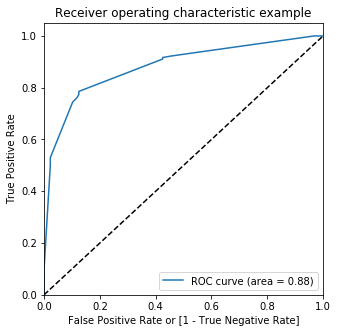

In [325]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

In [326]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.057159,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.203907,0,1,1,1,0,0,0,0,0,0,0
2,0.0,0.057159,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.203907,0,1,1,1,0,0,0,0,0,0,0
4,1.0,0.883596,1,1,1,1,1,1,1,1,1,1,0


In [327]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.349272  1.000000  0.000000
0.1   0.1  0.675676  0.922619  0.543131
0.2   0.2  0.675676  0.922619  0.543131
0.3   0.3  0.839917  0.773810  0.875399
0.4   0.4  0.839917  0.773810  0.875399
0.5   0.5  0.839917  0.773810  0.875399
0.6   0.6  0.844075  0.744048  0.897764
0.7   0.7  0.821206  0.529762  0.977636
0.8   0.8  0.821206  0.529762  0.977636
0.9   0.9  0.686071  0.101190  1.000000


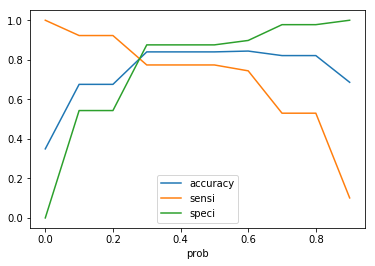

In [328]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## taking 0.3

In [329]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Survived,Survived_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.057159,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.203907,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.057159,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.203907,0,1,1,1,0,0,0,0,0,0,0,0
4,1.0,0.883596,1,1,1,1,1,1,1,1,1,1,0,1


In [330]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.83991683991684

In [331]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[274,  39],
       [ 38, 130]], dtype=int64)

In [332]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [333]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7738095238095238

In [334]:
# Let us calculate specificity
TN / float(TN+FP)

0.8753993610223643

In [335]:
from sklearn.metrics import precision_recall_curve

In [336]:
y_train_pred_final.Survived, y_train_pred_final.predicted

(0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      1.0
 5      0.0
 6      1.0
 7      0.0
 8      0.0
 9      0.0
 10     0.0
 11     1.0
 12     1.0
 13     0.0
 14     1.0
 15     0.0
 16     0.0
 17     0.0
 18     0.0
 19     1.0
 20     0.0
 21     0.0
 22     0.0
 23     1.0
 24     0.0
 25     0.0
 26     0.0
 27     1.0
 28     0.0
 29     0.0
       ... 
 451    1.0
 452    0.0
 453    0.0
 454    1.0
 455    0.0
 456    0.0
 457    0.0
 458    0.0
 459    0.0
 460    1.0
 461    1.0
 462    1.0
 463    1.0
 464    0.0
 465    0.0
 466    0.0
 467    0.0
 468    1.0
 469    1.0
 470    0.0
 471    0.0
 472    1.0
 473    1.0
 474    0.0
 475    1.0
 476    1.0
 477    1.0
 478    1.0
 479    0.0
 480    1.0
 Name: Survived, Length: 481, dtype: float64, 0      0
 1      0
 2      0
 3      0
 4      1
 5      0
 6      1
 7      0
 8      0
 9      0
 10     0
 11     1
 12     1
 13     0
 14     1
 15     0
 16     0
 17     0
 18     0
 19     0
 20     0
 21     0
 22

In [337]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

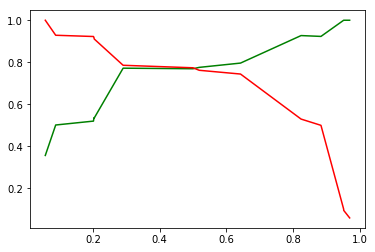

In [338]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [339]:
X_test.head()

,Single,SmallF,MedF,LargeF,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,Age_0,Age_1,Age_2,Age_3,Age_4,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
205,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
44,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
821,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
458,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
795,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [340]:
X_test = X_test[col]
X_test.head()

,LargeF,Cabin_E,Sex_female,Ticket_STONO,Title_Master,Pclass_3
205,0,0,1,0,0,1
44,0,0,1,0,0,1
821,0,0,0,0,0,1
458,0,0,1,0,0,0
795,0,0,0,0,0,0


In [341]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set

In [342]:
y_test_pred = res.predict(X_test_sm)

In [343]:
y_test_pred[:10]

205    0.642429
44     0.642429
821    0.057159
458    0.883596
795    0.203907
118    0.203907
424    0.057159
678    0.088341
269    0.883596
229    0.088341
dtype: float64

In [344]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [345]:
# Let's see the head
y_pred_1.head()

,0
205,0.642429
44,0.642429
821,0.057159
458,0.883596
795,0.203907


In [346]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)

In [347]:
# Putting CustID to index
y_test_df['PassengerId'] = y_test_df.index

In [348]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [349]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [350]:
y_pred_final.head()

,Survived,PassengerId,0
0,0.0,205,0.642429
1,1.0,44,0.642429
2,1.0,821,0.057159
3,1.0,458,0.883596
4,0.0,795,0.203907


In [351]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_prob'})

In [352]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['PassengerId','Survived','Survived_prob'], axis=1)

In [353]:
# Let's see the head of y_pred_final
y_pred_final.head()

,PassengerId,Survived,Survived_prob
0,205,0.0,0.642429
1,44,1.0,0.642429
2,821,1.0,0.057159
3,458,1.0,0.883596
4,795,0.0,0.203907


In [354]:
y_pred_final['final_predicted'] = y_pred_final.Survived_prob.map(lambda x: 1 if x > 0.3 else 0)

In [355]:
y_pred_final.head()

,PassengerId,Survived,Survived_prob,final_predicted
0,205,0.0,0.642429,1
1,44,1.0,0.642429,1
2,821,1.0,0.057159,0
3,458,1.0,0.883596,1
4,795,0.0,0.203907,0


In [356]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.8121951219512196

In [357]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[204,  32],
       [ 45, 129]], dtype=int64)

In [358]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [359]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7413793103448276

In [360]:
# Let us calculate specificity
TN / float(TN+FP)

0.864406779661017

In [361]:
submission_df = {"PassengerId": y_pred_final['PassengerId'],
                 "Survived": y_pred_final['final_predicted']}
submission = pd.DataFrame(submission_df)



In [362]:
submission.reset_index(drop=True, inplace=True)

In [364]:
submission.to_csv("submission.csv",index=False)